Penjelasan CRISP-DM

In [1]:
1. Busssiness Understanding
BBM Di Indonesia pada tahun 2022 mengalami kenaikan.
Antrian melonjak saat bahan bakar melonjak,
membuat masyarakat cemas akan ketersediaan akan bbm/bahan bakar.
Maka dari itu Saya akan menganalisis peringkat Konsumsi Bahan Bakar di Tahun 2022.
Untuk melihat hasil prediksinya mari kita uji coba.

2. Data Understanding
Peringkat Konsummsi bahan bakar biasaya dipengaruhi oleh
yang pertama bahan bakar berasal dari perusahaan yang sudah terpercaya,
selain itu dalam data set ini, pengaruhnya ada kondisi jalan raya,
mesinnya seperti apa, model kendaraan, nomor mesin, hingga kadar asapnya.

3. Data Preparation
Didalam Data set ini berisi :

Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,
Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),
Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),
CO2 Emissions(g/km),CO2 Rating,Smog Rating

Data ini dipilih, sehingga menghasilkan fitur dan target
x = EngineSize,Cylinders,FuelConsumptionCityL,CO2Emissions,CO2Rating,SmogRating
y = FuelConsumptionCombL

4. Modelling
Model ini memakai RandomForestRegressor

5. Evaluasi
Setelah tahap modeling selesai maka model diprediksi dan di lakukan test akurasi
Model dan data ini akurat yaitu sebesar 99%

6. Evaluation
Tahap akhir yaitu evaluation
di deploy di streamlit

SyntaxError: invalid syntax (Temp/ipykernel_1860/2930622739.py, line 1)

# Deskripsi library yang digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [3]:
df = pd.read_csv('Fuel.csv')

# Deskripsi Dataset

In [4]:
df.head()

,Model Year,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCityL,FuelConsumptionHwyL,FuelConsumptionCombL,FuelConsumptionComb,CO2Emissions,CO2Rating,SmogRating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model Year            946 non-null    int64  
 1   Make                  946 non-null    object 
 2   Model                 946 non-null    object 
 3   VehicleClass          946 non-null    object 
 4   EngineSize            946 non-null    float64
 5   Cylinders             946 non-null    int64  
 6   Transmission          946 non-null    object 
 7   FuelType              946 non-null    object 
 8   FuelConsumptionCityL  946 non-null    float64
 9   FuelConsumptionHwyL   946 non-null    float64
 10  FuelConsumptionCombL  946 non-null    float64
 11  FuelConsumptionComb   946 non-null    int64  
 12  CO2Emissions          946 non-null    int64  
 13  CO2Rating             946 non-null    int64  
 14  SmogRating            946 non-null    int64  
dtypes: float64(4), int64(6)

<Axes: >

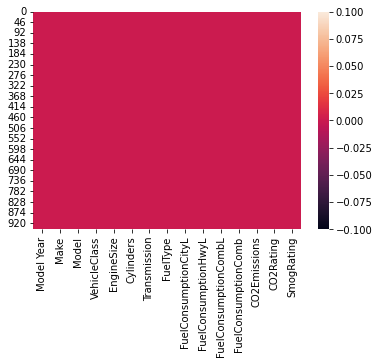

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Model Year,EngineSize,Cylinders,FuelConsumptionCityL,FuelConsumptionHwyL,FuelConsumptionCombL,FuelConsumptionComb,CO2Emissions,CO2Rating,SmogRating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


# Visualisasi Data

<Axes: >

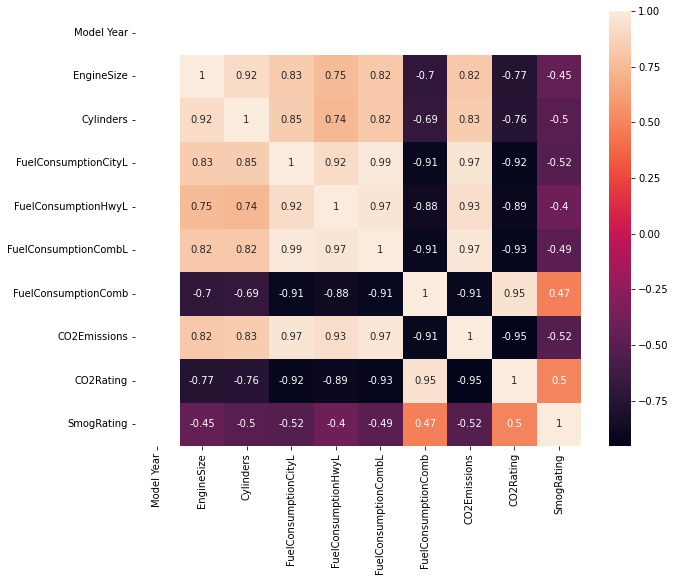

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Cylinders Berdasarkan Fuel Type

In [9]:
models = df.groupby('FuelType').count()[['Cylinders']].sort_values(by='Cylinders',ascending=True).reset_index()
models = models.rename(columns={'Cylinders':'ModelYear'})

(array([0, 1, 2, 3]),
 [Text(0, 0, 'E'), Text(1, 0, 'D'), Text(2, 0, 'X'), Text(3, 0, 'Z')])

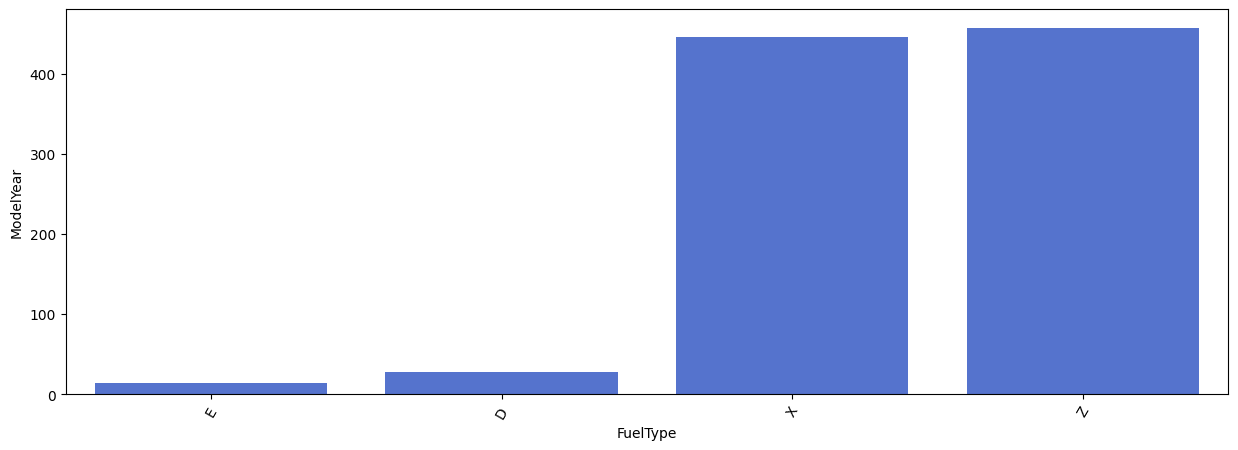

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['FuelType'], y=models['ModelYear'], color='royalblue')
plt.xticks(rotation=60)

# Distribusi Engine Size(L)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15184\1489374059.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EngineSize'])


<Axes: xlabel='EngineSize', ylabel='Density'>

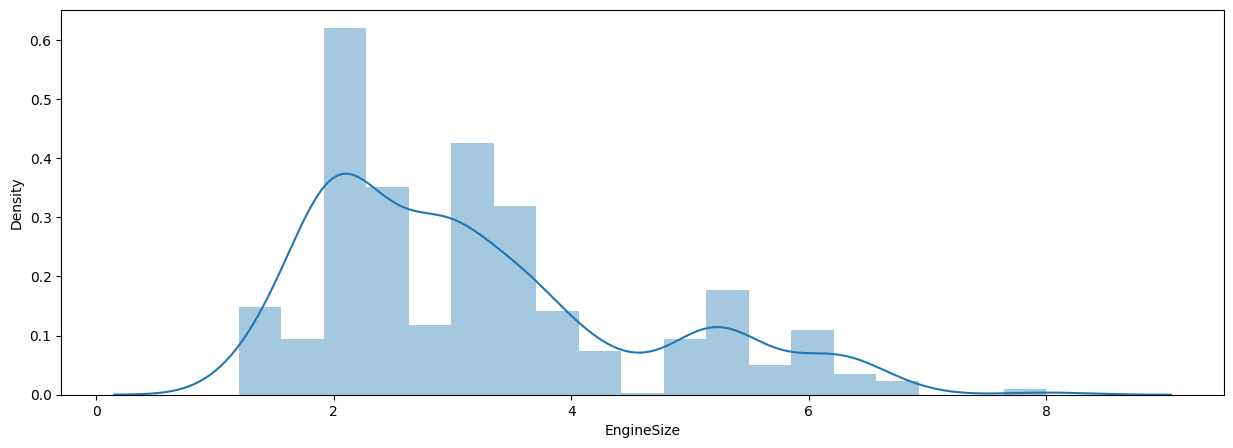

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['EngineSize'])

# Seleksi Fitur

In [9]:
features = ['EngineSize','Cylinders','FuelConsumptionCityL','CO2Emissions','CO2Rating','SmogRating']
x = df[features]
y = df['FuelConsumptionCombL']
x.shape, y.shape

((946, 6), (946,))

# Split Data Training Dan Data Testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_test.shape

(190,)

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

# Membuat Model Random Forest Regresor

In [12]:
score = model.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9983075123464906


# Membuat Inputan Model Random Forest Regresor

In [13]:
input_data = np.array([[2.4,4,9.9,200,6,3]])

prediction = model.predict(input_data)
print('Estimasi Jumlah Bahan Bakar:', prediction)

Estimasi Jumlah Bahan Bakar: [8.583]


C:\Users\salsabila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Save Model

In [14]:
import pickle

filename = 'fuel_randomforest.sav'
pickle.dump(model,open(filename,'wb'))